# ESMAC: Generate timeseries of size distribution

---


Setup dependencies:

In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd

# these sys settings are just for the jupyterhub demo
import sys
sys.path.append('/home/'+os.environ['USER']+'/.local/lib/python3.9/site-packages')

import esmac_diags.plotting.plot_esmac_diags as plot
import matplotlib.dates as mdates


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-in70tbfu because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<br>
Configure settings:

In [2]:
# set site name.
site = 'HISCALE'



# path of prepared files
data_path = '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/prep_data/'

prep_model_path = data_path +site+'/model/'
prep_obs_path = data_path +site+'/surface/'

# set output path for plots
figpath= '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/figures/'+site+'/surface/'




<br>
Read in data:

In [3]:

filename = prep_obs_path + 'cloud_2d_'+site+'.nc'
obsdata = xr.open_dataset(filename)
time_cf = obsdata['time'].load()
height0 = obsdata['height'].load()
cf_obs = obsdata['cloud'].load()
obsdata.close()


filename = prep_model_path + 'E3SMv1_'+site+'_profiles.nc'
modeldata = xr.open_dataset(filename)
time_m1 = modeldata['time'].load()
height1 = modeldata['height'].load()
cf_e3sm1 = modeldata['cloud_z'].load()
modeldata.close()

filename = prep_model_path + 'E3SMv2_'+site+'_profiles.nc'
modeldata = xr.open_dataset(filename)
time_m2 = modeldata['time'].load()
height2 = modeldata['height'].load()
cf_e3sm2 = modeldata['cloud_z'].load()
modeldata.close()



<br> Specific data treatment:

In [4]:
# unit from 1 to %
cf_e3sm1 = cf_e3sm1*100
cf_e3sm2 = cf_e3sm2*100
for ii in range(cf_e3sm1.shape[0]):
    idx=cf_e3sm1[ii,:]<0
    cf_e3sm1[ii,idx]=0
for ii in range(cf_e3sm2.shape[0]):
    idx=cf_e3sm2[ii,:]<0
    cf_e3sm2[ii,idx]=0
    
# trim for the same time period
IOP = 'IOP1'
time1 = np.datetime64('2016-04-25')
time2 = np.datetime64('2016-05-22')
time = pd.date_range(start='2016-04-25', end='2016-05-22', freq="H")
# IOP = 'IOP2'
# time1 = np.datetime64('2016-08-28')
# time2 = np.datetime64('2016-09-23')
# time = pd.date_range(start='2016-08-28', end='2016-09-23', freq="H")

cf_obs = cf_obs[np.logical_and(time_cf>=time1, time_cf<=time2),:]
cf_e3sm1 = cf_e3sm1[np.logical_and(time_m1>=time1, time_m1<=time2),:]
cf_e3sm2 = cf_e3sm2[np.logical_and(time_m2>=time1, time_m2<=time2),:]

<br>Generate plots:

/home/monicaihli/.local/lib/python3.9/site-packages/esmac_diags/plotting/plot_esmac_diags.py:101: UserWarning: Use the colorbar set_ticks() method instead.
  cbar.ax.set_yticks(levellist)


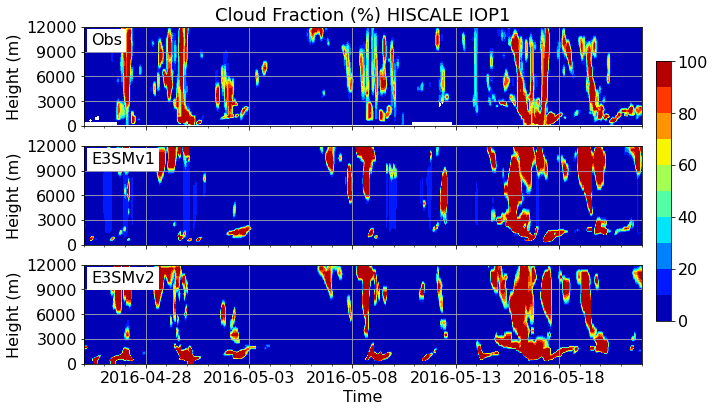

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# plot 
if not os.path.exists(figpath):
    os.makedirs(figpath)

fig,ax = plot.timeseries_2d([time, time, time], [height0, height1, height2], 
                            [cf_obs.data.T, cf_e3sm1.data.T, cf_e3sm2.data.T], ylimit=(0,12000),
                        yticks=[0,3000,6000,9000,12000],xlabel='Time', ylabel='Height (m)',
                        legend = ['Obs','E3SMv1','E3SMv2'], levellist=np.arange(0,101,10),
                         title= 'Cloud Fraction (%) '+site+' '+IOP,  cmap='jet')
ax[0].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax[1].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax[2].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=5))
#fig.savefig(figpath+'timeseries_cloud2d_'+site+'_'+IOP+'.png',dpi=fig.dpi,bbox_inches='tight', pad_inches=1)

# show figures in interactive commandline screen
import matplotlib.pyplot as plt
plt.show()   